##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE189903**

file previously downloaded:
GSE189903_RAW.tar

unzipped using 
``` bash
tar -xvf GSE189903_RAW.tar
```

This gives the following files: 
* GSM5709304_1CB_raw_feature_bc_matrix.h5
* GSM5709305_1CN_raw_feature_bc_matrix.h5
* GSM5709306_1CT1_raw_feature_bc_matrix.h5
* GSM5709307_1CT2_raw_feature_bc_matrix.h5
* GSM5709308_2CN_raw_feature_bc_matrix.h5
* GSM5709309_2CT1_raw_feature_bc_matrix.h5
* GSM5709310_2CT2_raw_feature_bc_matrix.h5
* GSM5709311_2CT3_raw_feature_bc_matrix.h5
* GSM5709312_3CB_raw_feature_bc_matrix.h5
* GSM5709313_3CT1_raw_feature_bc_matrix.h5
* GSM5709314_3CT2_raw_feature_bc_matrix.h5
* GSM5709315_1HB_raw_feature_bc_matrix.h5
* GSM5709316_1HN_raw_feature_bc_matrix.h5
* GSM5709317_1HT1_raw_feature_bc_matrix.h5
* GSM5709318_1HT2_raw_feature_bc_matrix.h5
* GSM5709319_1HT3_raw_feature_bc_matrix.h5
* GSM5709320_2HB_raw_feature_bc_matrix.h5
* GSM5709321_2HN_raw_feature_bc_matrix.h5
* GSM5709322_2HT2_raw_feature_bc_matrix.h5
* GSM5709323_3HB_raw_feature_bc_matrix.h5
* GSM5709324_3HN_raw_feature_bc_matrix.h5
* GSM5709325_3HT1_raw_feature_bc_matrix.h5
* GSM5709326_3HT2_raw_feature_bc_matrix.h5
* GSM5709327_3HT3_raw_feature_bc_matrix.h5
* GSM5709328_4HB_raw_feature_bc_matrix.h5
* GSM5709329_4HN_raw_feature_bc_matrix.h5
* GSM5709330_4HT1_raw_feature_bc_matrix.h5
* GSM5709331_4HT3_raw_feature_bc_matrix.h5
* GSM5709332_4HT2_raw_feature_bc_matrix.h5
* GSM5709333_1CT3_raw_feature_bc_matrix.h5
* GSM5709334_2CB_raw_feature_bc_matrix.h5
* GSM5709335_3CN_raw_feature_bc_matrix.h5
* GSM5709336_2HT1_raw_feature_bc_matrix.h5
* GSM5709337_2HT3_raw_feature_bc_matrix.h5

Removed GSM code from name to simplify

Dataset contains:
* 34 samples --> all human liver tissue from patients with hepatocellular carcinoma (HCC) and intrahepatic cholangiocarcinoma (iCCA)
* However these 34 samples come from 4 HCC patients and 3 iCCA patients (lots of different regions)

* five regions: three tumour cores (T1, T2, T3), one tumour border (B), and an adjacent normal tissue (N) from each
* seven patients: 1C, 2C, 3C, 1H, 2H, 3H, 4H (H for HCC and C for iCCA)

* Not sure whether to include all of these, will analyse below and decide

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE189903')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE189903"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
library(hdf5r)

In [5]:
#load all datasets
Pt_1CB.data <- Read10X_h5("1CB_raw_feature_bc_matrix.h5")
Pt_1CN.data <- Read10X_h5("1CN_raw_feature_bc_matrix.h5")
Pt_1CT1.data <- Read10X_h5("1CT1_raw_feature_bc_matrix.h5")
Pt_1CT2.data <- Read10X_h5("1CT2_raw_feature_bc_matrix.h5")
Pt_1CT3.data <- Read10X_h5("1CT3_raw_feature_bc_matrix.h5")
Pt_1HB.data <- Read10X_h5("1HB_raw_feature_bc_matrix.h5")
Pt_1HN.data <- Read10X_h5("1HN_raw_feature_bc_matrix.h5")
Pt_1HT1.data <- Read10X_h5("1HT1_raw_feature_bc_matrix.h5")
Pt_1HT2.data <- Read10X_h5("1HT2_raw_feature_bc_matrix.h5")
Pt_1HT3.data <- Read10X_h5("1HT3_raw_feature_bc_matrix.h5")
Pt_2CB.data <- Read10X_h5("2CB_raw_feature_bc_matrix.h5")
Pt_2CN.data <- Read10X_h5("2CN_raw_feature_bc_matrix.h5")
Pt_2CT1.data <- Read10X_h5("2CT1_raw_feature_bc_matrix.h5")
Pt_2CT2.data <- Read10X_h5("2CT2_raw_feature_bc_matrix.h5")
Pt_2CT3.data <- Read10X_h5("2CT3_raw_feature_bc_matrix.h5")
Pt_2HB.data <- Read10X_h5("2HB_raw_feature_bc_matrix.h5")
Pt_2HN.data <- Read10X_h5("2HN_raw_feature_bc_matrix.h5")
Pt_2HT1.data <- Read10X_h5("2HT1_raw_feature_bc_matrix.h5")
Pt_2HT2.data <- Read10X_h5("2HT2_raw_feature_bc_matrix.h5")
Pt_2HT3.data <- Read10X_h5("2HT3_raw_feature_bc_matrix.h5")
Pt_3CB.data <- Read10X_h5("3CB_raw_feature_bc_matrix.h5")
Pt_3CN.data <- Read10X_h5("3CN_raw_feature_bc_matrix.h5")
Pt_3CT1.data <- Read10X_h5("3CT1_raw_feature_bc_matrix.h5")
Pt_3CT2.data <- Read10X_h5("3CT2_raw_feature_bc_matrix.h5")
Pt_3HB.data <- Read10X_h5("3HB_raw_feature_bc_matrix.h5")
Pt_3HN.data <- Read10X_h5("3HN_raw_feature_bc_matrix.h5")
Pt_3HT1.data <- Read10X_h5("3HT1_raw_feature_bc_matrix.h5")
Pt_3HT2.data <- Read10X_h5("3HT2_raw_feature_bc_matrix.h5")
Pt_3HT3.data <- Read10X_h5("3HT3_raw_feature_bc_matrix.h5")
Pt_4HB.data <- Read10X_h5("4HB_raw_feature_bc_matrix.h5")
Pt_4HN.data <- Read10X_h5("4HN_raw_feature_bc_matrix.h5")
Pt_4HT1.data <- Read10X_h5("4HT1_raw_feature_bc_matrix.h5")
Pt_4HT2.data <- Read10X_h5("4HT2_raw_feature_bc_matrix.h5")
Pt_4HT3.data <- Read10X_h5("4HT3_raw_feature_bc_matrix.h5")

In [7]:
head(colnames(Pt_4HT3.data))

[1] "AAACCTGAGAAACCAT-1" "AAACCTGAGAAACCGC-1" "AAACCTGAGAAACCTA-1"
[4] "AAACCTGAGAAACGAG-1" "AAACCTGAGAAACGCC-1" "AAACCTGAGAAAGTGG-1"

In [8]:
#Add dataset info to colnames
colnames(Pt_1CB.data) <- paste0("GSE189903_1CB_", colnames(Pt_1CB.data))
colnames(Pt_1CN.data) <- paste0("GSE189903_1CN_", colnames(Pt_1CN.data))
colnames(Pt_1CT1.data) <- paste0("GSE189903_1CT1_", colnames(Pt_1CT1.data))
colnames(Pt_1CT2.data) <- paste0("GSE189903_1CT2_", colnames(Pt_1CT2.data))
colnames(Pt_1CT3.data) <- paste0("GSE189903_1CT3_", colnames(Pt_1CT3.data))

colnames(Pt_1HB.data) <- paste0("GSE189903_1HB_", colnames(Pt_1HB.data))
colnames(Pt_1HN.data) <- paste0("GSE189903_1HN_", colnames(Pt_1HN.data))
colnames(Pt_1HT1.data) <- paste0("GSE189903_1HT1_", colnames(Pt_1HT1.data))
colnames(Pt_1HT2.data) <- paste0("GSE189903_1HT2_", colnames(Pt_1HT2.data))
colnames(Pt_1HT3.data) <- paste0("GSE189903_1HT3_", colnames(Pt_1HT3.data))

colnames(Pt_2CB.data) <- paste0("GSE189903_2CB_", colnames(Pt_2CB.data))
colnames(Pt_2CN.data) <- paste0("GSE189903_2CN_", colnames(Pt_2CN.data))
colnames(Pt_2CT1.data) <- paste0("GSE189903_2CT1_", colnames(Pt_2CT1.data))
colnames(Pt_2CT2.data) <- paste0("GSE189903_2CT2_", colnames(Pt_2CT2.data))
colnames(Pt_2CT3.data) <- paste0("GSE189903_2CT3_", colnames(Pt_2CT3.data))

colnames(Pt_2HB.data) <- paste0("GSE189903_2HB_", colnames(Pt_2HB.data))
colnames(Pt_2HN.data) <- paste0("GSE189903_2HN_", colnames(Pt_2HN.data))
colnames(Pt_2HT1.data) <- paste0("GSE189903_2HT1_", colnames(Pt_2HT1.data))
colnames(Pt_2HT2.data) <- paste0("GSE189903_2HT2_", colnames(Pt_2HT2.data))
colnames(Pt_2HT3.data) <- paste0("GSE189903_2HT3_", colnames(Pt_2HT3.data))

colnames(Pt_3CB.data) <- paste0("GSE189903_3CB_", colnames(Pt_3CB.data))
colnames(Pt_3CN.data) <- paste0("GSE189903_3CN_", colnames(Pt_3CN.data))
colnames(Pt_3CT1.data) <- paste0("GSE189903_3CT1_", colnames(Pt_3CT1.data))
colnames(Pt_3CT2.data) <- paste0("GSE189903_3CT2_", colnames(Pt_3CT2.data))

colnames(Pt_3HB.data) <- paste0("GSE189903_3HB_", colnames(Pt_3HB.data))
colnames(Pt_3HN.data) <- paste0("GSE189903_3HN_", colnames(Pt_3HN.data))
colnames(Pt_3HT1.data) <- paste0("GSE189903_3HT1_", colnames(Pt_3HT1.data))
colnames(Pt_3HT2.data) <- paste0("GSE189903_3HT2_", colnames(Pt_3HT2.data))
colnames(Pt_3HT3.data) <- paste0("GSE189903_3HT3_", colnames(Pt_3HT3.data))

colnames(Pt_4HB.data) <- paste0("GSE189903_4HB_", colnames(Pt_4HB.data))
colnames(Pt_4HN.data) <- paste0("GSE189903_4HN_", colnames(Pt_4HN.data))
colnames(Pt_4HT1.data) <- paste0("GSE189903_4HT1_", colnames(Pt_4HT1.data))
colnames(Pt_4HT2.data) <- paste0("GSE189903_4HT2_", colnames(Pt_4HT2.data))
colnames(Pt_4HT3.data) <- paste0("GSE189903_4HT3_", colnames(Pt_4HT3.data))

In [9]:
head(colnames(Pt_4HT3.data))

[1] "GSE189903_4HT3_AAACCTGAGAAACCAT-1" "GSE189903_4HT3_AAACCTGAGAAACCGC-1"
[3] "GSE189903_4HT3_AAACCTGAGAAACCTA-1" "GSE189903_4HT3_AAACCTGAGAAACGAG-1"
[5] "GSE189903_4HT3_AAACCTGAGAAACGCC-1" "GSE189903_4HT3_AAACCTGAGAAAGTGG-1"

In [22]:
#create seperate seurat object for each sample
Pt_1CB <- CreateSeuratObject(counts = Pt_1CB.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_1CB@meta.data$sample_type <- "tumour border"
Pt_1CB@meta.data$cancer_type <- "iCCA"
Pt_1CB@meta.data$patient_id <- "Pt_1C"
Pt_1CB@meta.data$sample_id <- "GSE189903_iCCA_Pt1C_border"

#create seperate seurat object for each sample
Pt_1CN <- CreateSeuratObject(counts = Pt_1CN.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_1CN@meta.data$sample_type <- "Healthy liver"
Pt_1CN@meta.data$cancer_type <- "Healthy"
Pt_1CN@meta.data$patient_id <- "Pt_1C"
Pt_1CN@meta.data$sample_id <- "GSE189903_iCCA_Pt1C_normal"

#create seperate seurat object for each sample
Pt_1CT1 <- CreateSeuratObject(counts = Pt_1CT1.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_1CT1@meta.data$sample_type <- "tumour"
Pt_1CT1@meta.data$cancer_type <- "iCCA"
Pt_1CT1@meta.data$patient_id <- "Pt_1C"
Pt_1CT1@meta.data$sample_id <- "GSE189903_iCCA_Pt1C_tumour_1"

#create seperate seurat object for each sample
Pt_1CT2 <- CreateSeuratObject(counts = Pt_1CT2.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_1CT2@meta.data$sample_type <- "tumour"
Pt_1CT2@meta.data$cancer_type <- "iCCA"
Pt_1CT2@meta.data$patient_id <- "Pt_1C"
Pt_1CT2@meta.data$sample_id <- "GSE189903_iCCA_Pt1C_tumour_2"

#create seperate seurat object for each sample
Pt_1CT3 <- CreateSeuratObject(counts = Pt_1CT3.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_1CT3@meta.data$sample_type <- "tumour"
Pt_1CT3@meta.data$cancer_type <- "iCCA"
Pt_1CT3@meta.data$patient_id <- "Pt_1C"
Pt_1CT3@meta.data$sample_id <- "GSE189903_iCCA_Pt1C_tumour_3"

In [23]:
#create seperate seurat object for each sample
Pt_2CB <- CreateSeuratObject(counts = Pt_2CB.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_2CB@meta.data$sample_type <- "tumour border"
Pt_2CB@meta.data$cancer_type <- "iCCA"
Pt_2CB@meta.data$patient_id <- "Pt_2C"
Pt_2CB@meta.data$sample_id <- "GSE189903_iCCA_Pt2C_border"

#create seperate seurat object for each sample
Pt_2CN <- CreateSeuratObject(counts = Pt_2CN.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_2CN@meta.data$sample_type <- "Healthy liver"
Pt_2CN@meta.data$cancer_type <- "Healthy"
Pt_2CN@meta.data$patient_id <- "Pt_2C"
Pt_2CN@meta.data$sample_id <- "GSE189903_iCCA_Pt2C_normal"

#create seperate seurat object for each sample
Pt_2CT1 <- CreateSeuratObject(counts = Pt_2CT1.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_2CT1@meta.data$sample_type <- "tumour"
Pt_2CT1@meta.data$cancer_type <- "iCCA"
Pt_2CT1@meta.data$patient_id <- "Pt_2C"
Pt_2CT1@meta.data$sample_id <- "GSE189903_iCCA_Pt2C_tumour_1"

#create seperate seurat object for each sample
Pt_2CT2 <- CreateSeuratObject(counts = Pt_2CT2.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_2CT2@meta.data$sample_type <- "tumour"
Pt_2CT2@meta.data$cancer_type <- "iCCA"
Pt_2CT2@meta.data$patient_id <- "Pt_2C"
Pt_2CT2@meta.data$sample_id <- "GSE189903_iCCA_Pt2C_tumour_2"

#create seperate seurat object for each sample
Pt_2CT3 <- CreateSeuratObject(counts = Pt_2CT3.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_2CT3@meta.data$sample_type <- "tumour"
Pt_2CT3@meta.data$cancer_type <- "iCCA"
Pt_2CT3@meta.data$patient_id <- "Pt_2C"
Pt_2CT3@meta.data$sample_id <- "GSE189903_iCCA_Pt2C_tumour_3"

In [24]:
#create seperate seurat object for each sample
Pt_3CB <- CreateSeuratObject(counts = Pt_3CB.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_3CB@meta.data$sample_type <- "tumour border"
Pt_3CB@meta.data$cancer_type <- "iCCA"
Pt_3CB@meta.data$patient_id <- "Pt_3C"
Pt_3CB@meta.data$sample_id <- "GSE189903_iCCA_Pt3C_border"

#create seperate seurat object for each sample
Pt_3CN <- CreateSeuratObject(counts = Pt_3CN.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_3CN@meta.data$sample_type <- "Healthy liver"
Pt_3CN@meta.data$cancer_type <- "Healthy"
Pt_3CN@meta.data$patient_id <- "Pt_3C"
Pt_3CN@meta.data$sample_id <- "GSE189903_iCCA_Pt3C_normal"

#create seperate seurat object for each sample
Pt_3CT1 <- CreateSeuratObject(counts = Pt_3CT1.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_3CT1@meta.data$sample_type <- "tumour"
Pt_3CT1@meta.data$cancer_type <- "iCCA"
Pt_3CT1@meta.data$patient_id <- "Pt_3C"
Pt_3CT1@meta.data$sample_id <- "GSE189903_iCCA_Pt3C_tumour_1"

#create seperate seurat object for each sample
Pt_3CT2 <- CreateSeuratObject(counts = Pt_3CT2.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_3CT2@meta.data$sample_type <- "tumour"
Pt_3CT2@meta.data$cancer_type <- "iCCA"
Pt_3CT2@meta.data$patient_id <- "Pt_3C"
Pt_3CT2@meta.data$sample_id <- "GSE189903_iCCA_Pt3C_tumour_2"

In [25]:
#create seperate seurat object for each sample
Pt_1HB <- CreateSeuratObject(counts = Pt_1HB.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_1HB@meta.data$sample_type <- "tumour border"
Pt_1HB@meta.data$cancer_type <- "HCC"
Pt_1HB@meta.data$patient_id <- "Pt_1H"
Pt_1HB@meta.data$sample_id <- "GSE189903_HCC_Pt1H_border"

#create seperate seurat object for each sample
Pt_1HN <- CreateSeuratObject(counts = Pt_1HN.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_1HN@meta.data$sample_type <- "Healthy liver"
Pt_1HN@meta.data$cancer_type <- "Healthy"
Pt_1HN@meta.data$patient_id <- "Pt_1H"
Pt_1HN@meta.data$sample_id <- "GSE189903_HCC_Pt1H_normal"

#create seperate seurat object for each sample
Pt_1HT1 <- CreateSeuratObject(counts = Pt_1HT1.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_1HT1@meta.data$sample_type <- "tumour"
Pt_1HT1@meta.data$cancer_type <- "HCC"
Pt_1HT1@meta.data$patient_id <- "Pt_1H"
Pt_1HT1@meta.data$sample_id <- "GSE189903_HCC_Pt1H_tumour_1"

#create seperate seurat object for each sample
Pt_1HT2 <- CreateSeuratObject(counts = Pt_1HT2.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_1HT2@meta.data$sample_type <- "tumour"
Pt_1HT2@meta.data$cancer_type <- "HCC"
Pt_1HT2@meta.data$patient_id <- "Pt_1H"
Pt_1HT2@meta.data$sample_id <- "GSE189903_HCC_Pt1H_tumour_2"

#create seperate seurat object for each sample
Pt_1HT3 <- CreateSeuratObject(counts = Pt_1HT3.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_1HT3@meta.data$sample_type <- "tumour"
Pt_1HT3@meta.data$cancer_type <- "HCC"
Pt_1HT3@meta.data$patient_id <- "Pt_1H"
Pt_1HT3@meta.data$sample_id <- "GSE189903_HCC_Pt1H_tumour_3"

In [26]:
#create seperate seurat object for each sample
Pt_2HB <- CreateSeuratObject(counts = Pt_2HB.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_2HB@meta.data$sample_type <- "tumour border"
Pt_2HB@meta.data$cancer_type <- "HCC"
Pt_2HB@meta.data$patient_id <- "Pt_2H"
Pt_2HB@meta.data$sample_id <- "GSE189903_HCC_Pt2H_border"

#create seperate seurat object for each sample
Pt_2HN <- CreateSeuratObject(counts = Pt_2HN.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_2HN@meta.data$sample_type <- "Healthy liver"
Pt_2HN@meta.data$cancer_type <- "Healthy"
Pt_2HN@meta.data$patient_id <- "Pt_2H"
Pt_2HN@meta.data$sample_id <- "GSE189903_HCC_Pt2H_normal"

#create seperate seurat object for each sample
Pt_2HT1 <- CreateSeuratObject(counts = Pt_2HT1.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_2HT1@meta.data$sample_type <- "tumour"
Pt_2HT1@meta.data$cancer_type <- "HCC"
Pt_2HT1@meta.data$patient_id <- "Pt_2H"
Pt_2HT1@meta.data$sample_id <- "GSE189903_HCC_Pt2H_tumour_1"

#create seperate seurat object for each sample
Pt_2HT2 <- CreateSeuratObject(counts = Pt_2HT2.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_2HT2@meta.data$sample_type <- "tumour"
Pt_2HT2@meta.data$cancer_type <- "HCC"
Pt_2HT2@meta.data$patient_id <- "Pt_2H"
Pt_2HT2@meta.data$sample_id <- "GSE189903_HCC_Pt2H_tumour_2"

#create seperate seurat object for each sample
Pt_2HT3 <- CreateSeuratObject(counts = Pt_2HT3.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_2HT3@meta.data$sample_type <- "tumour"
Pt_2HT3@meta.data$cancer_type <- "HCC"
Pt_2HT3@meta.data$patient_id <- "Pt_2H"
Pt_2HT3@meta.data$sample_id <- "GSE189903_HCC_Pt2H_tumour_3"

In [27]:
#create seperate seurat object for each sample
Pt_3HB <- CreateSeuratObject(counts = Pt_3HB.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_3HB@meta.data$sample_type <- "tumour border"
Pt_3HB@meta.data$cancer_type <- "HCC"
Pt_3HB@meta.data$patient_id <- "Pt_3H"
Pt_3HB@meta.data$sample_id <- "GSE189903_HCC_Pt3H_border"

#create seperate seurat object for each sample
Pt_3HN <- CreateSeuratObject(counts = Pt_3HN.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_3HN@meta.data$sample_type <- "Healthy liver"
Pt_3HN@meta.data$cancer_type <- "Healthy"
Pt_3HN@meta.data$patient_id <- "Pt_3H"
Pt_3HN@meta.data$sample_id <- "GSE189903_HCC_Pt3H_normal"

#create seperate seurat object for each sample
Pt_3HT1 <- CreateSeuratObject(counts = Pt_3HT1.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_3HT1@meta.data$sample_type <- "tumour"
Pt_3HT1@meta.data$cancer_type <- "HCC"
Pt_3HT1@meta.data$patient_id <- "Pt_3H"
Pt_3HT1@meta.data$sample_id <- "GSE189903_HCC_Pt3H_tumour_1"

#create seperate seurat object for each sample
Pt_3HT2 <- CreateSeuratObject(counts = Pt_3HT2.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_3HT2@meta.data$sample_type <- "tumour"
Pt_3HT2@meta.data$cancer_type <- "HCC"
Pt_3HT2@meta.data$patient_id <- "Pt_3H"
Pt_3HT2@meta.data$sample_id <- "GSE189903_HCC_Pt3H_tumour_2"

#create seperate seurat object for each sample
Pt_3HT3 <- CreateSeuratObject(counts = Pt_3HT3.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_3HT3@meta.data$sample_type <- "tumour"
Pt_3HT3@meta.data$cancer_type <- "HCC"
Pt_3HT3@meta.data$patient_id <- "Pt_3H"
Pt_3HT3@meta.data$sample_id <- "GSE189903_HCC_Pt3H_tumour_3"

In [28]:
#create seperate seurat object for each sample
Pt_4HB <- CreateSeuratObject(counts = Pt_4HB.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_4HB@meta.data$sample_type <- "tumour border"
Pt_4HB@meta.data$cancer_type <- "HCC"
Pt_4HB@meta.data$patient_id <- "Pt_4H"
Pt_4HB@meta.data$sample_id <- "GSE189903_HCC_Pt4H_border"

#create seperate seurat object for each sample
Pt_4HN <- CreateSeuratObject(counts = Pt_4HN.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_4HN@meta.data$sample_type <- "Healthy liver"
Pt_4HN@meta.data$cancer_type <- "Healthy"
Pt_4HN@meta.data$patient_id <- "Pt_4H"
Pt_4HN@meta.data$sample_id <- "GSE189903_HCC_Pt4H_normal"

#create seperate seurat object for each sample
Pt_4HT1 <- CreateSeuratObject(counts = Pt_4HT1.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_4HT1@meta.data$sample_type <- "tumour"
Pt_4HT1@meta.data$cancer_type <- "HCC"
Pt_4HT1@meta.data$patient_id <- "Pt_4H"
Pt_4HT1@meta.data$sample_id <- "GSE189903_HCC_Pt4H_tumour_1"

#create seperate seurat object for each sample
Pt_4HT2 <- CreateSeuratObject(counts = Pt_4HT2.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_4HT2@meta.data$sample_type <- "tumour"
Pt_4HT2@meta.data$cancer_type <- "HCC"
Pt_4HT2@meta.data$patient_id <- "Pt_4H"
Pt_4HT2@meta.data$sample_id <- "GSE189903_HCC_Pt4H_tumour_2"

#create seperate seurat object for each sample
Pt_4HT3 <- CreateSeuratObject(counts = Pt_4HT3.data, project = "GSE189903", min.features = 200)
#add metadata to sample
Pt_4HT3@meta.data$sample_type <- "tumour"
Pt_4HT3@meta.data$cancer_type <- "HCC"
Pt_4HT3@meta.data$patient_id <- "Pt_4H"
Pt_4HT3@meta.data$sample_id <- "GSE189903_HCC_Pt4H_tumour_3"

In [29]:
head(Pt_4HT2@meta.data)
head(Pt_1CB@meta.data)
head(Pt_2HN@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE189903_4HT2_AAACCTGAGAACTCGG-1 GSE189903    542       298        
GSE189903_4HT2_AAACCTGAGAAGGTGA-1 GSE189903  20319      4070        
GSE189903_4HT2_AAACCTGAGACTGTAA-1 GSE189903    256       206        
GSE189903_4HT2_AAACCTGAGAGCTTCT-1 GSE189903    430       258        
GSE189903_4HT2_AAACCTGAGCTATGCT-1 GSE189903    583       308        
GSE189903_4HT2_AAACCTGAGGAGTAGA-1 GSE189903    445       345        
                                  sample_type cancer_type patient_id
GSE189903_4HT2_AAACCTGAGAACTCGG-1 tumour      HCC         Pt_4H     
GSE189903_4HT2_AAACCTGAGAAGGTGA-1 tumour      HCC         Pt_4H     
GSE189903_4HT2_AAACCTGAGACTGTAA-1 tumour      HCC         Pt_4H     
GSE189903_4HT2_AAACCTGAGAGCTTCT-1 tumour      HCC         Pt_4H     
GSE189903_4HT2_AAACCTGAGCTATGCT-1 tumour      HCC         Pt_4H     
GSE189903_4HT2_AAACCTGAGGAGTAGA-1 tumour      HCC         Pt_4H     
                                  sample_id                  
GSE189903_4HT2_AAACCTGAGAACTCGG-1 GSE189903_HCC_Pt4H_tumour_2
GSE189903_4HT2_AAACCTGAGAAGGTGA-1 GSE189903_HCC_Pt4H_tumour_2
GSE189903_4HT2_AAACCTGAGACTGTAA-1 GSE189903_HCC_Pt4H_tumour_2
GSE189903_4HT2_AAACCTGAGAGCTTCT-1 GSE189903_HCC_Pt4H_tumour_2
GSE189903_4HT2_AAACCTGAGCTATGCT-1 GSE189903_HCC_Pt4H_tumour_2
GSE189903_4HT2_AAACCTGAGGAGTAGA-1 GSE189903_HCC_Pt4H_tumour_2

orig.ident nCount_RNA nFeature_RNA
GSE189903_1CB_AAACGGGAGTCCATAC-1 GSE189903   617        351        
GSE189903_1CB_AAAGATGCATATGCTG-1 GSE189903  1321        720        
GSE189903_1CB_AAAGATGTCCCGGATG-1 GSE189903   492        324        
GSE189903_1CB_AAAGCAAAGTGCCATT-1 GSE189903  1038        562        
GSE189903_1CB_AAAGCAAAGTGTGGCA-1 GSE189903  2246       1179        
GSE189903_1CB_AAAGCAAAGTTTGCGT-1 GSE189903  1057        772        
                                 sample_type   cancer_type patient_id
GSE189903_1CB_AAACGGGAGTCCATAC-1 tumour border iCCA        Pt_1C     
GSE189903_1CB_AAAGATGCATATGCTG-1 tumour border iCCA        Pt_1C     
GSE189903_1CB_AAAGATGTCCCGGATG-1 tumour border iCCA        Pt_1C     
GSE189903_1CB_AAAGCAAAGTGCCATT-1 tumour border iCCA        Pt_1C     
GSE189903_1CB_AAAGCAAAGTGTGGCA-1 tumour border iCCA        Pt_1C     
GSE189903_1CB_AAAGCAAAGTTTGCGT-1 tumour border iCCA        Pt_1C     
                                 sample_id                 
GSE189903_1CB_AAACGGGAGTCCATAC-1 GSE189903_iCCA_Pt1C_border
GSE189903_1CB_AAAGATGCATATGCTG-1 GSE189903_iCCA_Pt1C_border
GSE189903_1CB_AAAGATGTCCCGGATG-1 GSE189903_iCCA_Pt1C_border
GSE189903_1CB_AAAGCAAAGTGCCATT-1 GSE189903_iCCA_Pt1C_border
GSE189903_1CB_AAAGCAAAGTGTGGCA-1 GSE189903_iCCA_Pt1C_border
GSE189903_1CB_AAAGCAAAGTTTGCGT-1 GSE189903_iCCA_Pt1C_border

orig.ident nCount_RNA nFeature_RNA
GSE189903_2HN_AAACCTGTCTTCATGT-1 GSE189903   1656       776        
GSE189903_2HN_AAACGGGCAGGTGGAT-1 GSE189903  24377      4156        
GSE189903_2HN_AAAGCAAGTGTGACGA-1 GSE189903   3944      1303        
GSE189903_2HN_AACGTTGGTGTGACCC-1 GSE189903   3499      1124        
GSE189903_2HN_AACTCCCCAAACTGCT-1 GSE189903   4348      1494        
GSE189903_2HN_AAGACCTAGATCGGGT-1 GSE189903  29433      5240        
                                 sample_type   cancer_type patient_id
GSE189903_2HN_AAACCTGTCTTCATGT-1 Healthy liver Healthy     Pt_2H     
GSE189903_2HN_AAACGGGCAGGTGGAT-1 Healthy liver Healthy     Pt_2H     
GSE189903_2HN_AAAGCAAGTGTGACGA-1 Healthy liver Healthy     Pt_2H     
GSE189903_2HN_AACGTTGGTGTGACCC-1 Healthy liver Healthy     Pt_2H     
GSE189903_2HN_AACTCCCCAAACTGCT-1 Healthy liver Healthy     Pt_2H     
GSE189903_2HN_AAGACCTAGATCGGGT-1 Healthy liver Healthy     Pt_2H     
                                 sample_id                
GSE189903_2HN_AAACCTGTCTTCATGT-1 GSE189903_HCC_Pt2H_normal
GSE189903_2HN_AAACGGGCAGGTGGAT-1 GSE189903_HCC_Pt2H_normal
GSE189903_2HN_AAAGCAAGTGTGACGA-1 GSE189903_HCC_Pt2H_normal
GSE189903_2HN_AACGTTGGTGTGACCC-1 GSE189903_HCC_Pt2H_normal
GSE189903_2HN_AACTCCCCAAACTGCT-1 GSE189903_HCC_Pt2H_normal
GSE189903_2HN_AAGACCTAGATCGGGT-1 GSE189903_HCC_Pt2H_normal

In [30]:
#Merge seurat objects (at first keep all together)

LIV <- merge(Pt_1CB, y = c(Pt_1CN, Pt_1CT1, Pt_1CT2, Pt_1CT3, Pt_2CB, Pt_2CN, Pt_2CT1, Pt_2CT2, Pt_2CT3, Pt_3CB, Pt_3CN, Pt_3CT1, Pt_3CT2, Pt_1HB, Pt_1HN, Pt_1HT1, Pt_1HT2, Pt_1HT3, Pt_2HB, Pt_2HN, Pt_2HT1, Pt_2HT2, Pt_2HT3, Pt_3HB, Pt_3HN, Pt_3HT1, Pt_3HT2, Pt_3HT3, Pt_4HB, Pt_4HN, Pt_4HT1, Pt_4HT2, Pt_4HT3), project = "GSE189903")

In [31]:
LIV
head(LIV@meta.data)
tail(LIV@meta.data)

An object of class Seurat 
33538 features across 255708 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 34 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17, counts.18, counts.19, counts.20, counts.21, counts.22, counts.23, counts.24, counts.25, counts.26, counts.27, counts.28, counts.29, counts.30, counts.31, counts.32, counts.33, counts.34

orig.ident nCount_RNA nFeature_RNA
GSE189903_1CB_AAACGGGAGTCCATAC-1 GSE189903   617        351        
GSE189903_1CB_AAAGATGCATATGCTG-1 GSE189903  1321        720        
GSE189903_1CB_AAAGATGTCCCGGATG-1 GSE189903   492        324        
GSE189903_1CB_AAAGCAAAGTGCCATT-1 GSE189903  1038        562        
GSE189903_1CB_AAAGCAAAGTGTGGCA-1 GSE189903  2246       1179        
GSE189903_1CB_AAAGCAAAGTTTGCGT-1 GSE189903  1057        772        
                                 sample_type   cancer_type patient_id
GSE189903_1CB_AAACGGGAGTCCATAC-1 tumour border iCCA        Pt_1C     
GSE189903_1CB_AAAGATGCATATGCTG-1 tumour border iCCA        Pt_1C     
GSE189903_1CB_AAAGATGTCCCGGATG-1 tumour border iCCA        Pt_1C     
GSE189903_1CB_AAAGCAAAGTGCCATT-1 tumour border iCCA        Pt_1C     
GSE189903_1CB_AAAGCAAAGTGTGGCA-1 tumour border iCCA        Pt_1C     
GSE189903_1CB_AAAGCAAAGTTTGCGT-1 tumour border iCCA        Pt_1C     
                                 sample_id                 
GSE189903_1CB_AAACGGGAGTCCATAC-1 GSE189903_iCCA_Pt1C_border
GSE189903_1CB_AAAGATGCATATGCTG-1 GSE189903_iCCA_Pt1C_border
GSE189903_1CB_AAAGATGTCCCGGATG-1 GSE189903_iCCA_Pt1C_border
GSE189903_1CB_AAAGCAAAGTGCCATT-1 GSE189903_iCCA_Pt1C_border
GSE189903_1CB_AAAGCAAAGTGTGGCA-1 GSE189903_iCCA_Pt1C_border
GSE189903_1CB_AAAGCAAAGTTTGCGT-1 GSE189903_iCCA_Pt1C_border

orig.ident nCount_RNA nFeature_RNA
GSE189903_4HT3_TTTGGTTGTGGTTTCA-1 GSE189903   1849       943        
GSE189903_4HT3_TTTGGTTTCCTATGTT-1 GSE189903   2659      1172        
GSE189903_4HT3_TTTGTCACAAATTGCC-1 GSE189903   4366      1882        
GSE189903_4HT3_TTTGTCATCAGCACAT-1 GSE189903   4859      1563        
GSE189903_4HT3_TTTGTCATCCTGCTTG-1 GSE189903   2266       689        
GSE189903_4HT3_TTTGTCATCTCGTTTA-1 GSE189903  11585      3382        
                                  sample_type cancer_type patient_id
GSE189903_4HT3_TTTGGTTGTGGTTTCA-1 tumour      HCC         Pt_4H     
GSE189903_4HT3_TTTGGTTTCCTATGTT-1 tumour      HCC         Pt_4H     
GSE189903_4HT3_TTTGTCACAAATTGCC-1 tumour      HCC         Pt_4H     
GSE189903_4HT3_TTTGTCATCAGCACAT-1 tumour      HCC         Pt_4H     
GSE189903_4HT3_TTTGTCATCCTGCTTG-1 tumour      HCC         Pt_4H     
GSE189903_4HT3_TTTGTCATCTCGTTTA-1 tumour      HCC         Pt_4H     
                                  sample_id                  
GSE189903_4HT3_TTTGGTTGTGGTTTCA-1 GSE189903_HCC_Pt4H_tumour_3
GSE189903_4HT3_TTTGGTTTCCTATGTT-1 GSE189903_HCC_Pt4H_tumour_3
GSE189903_4HT3_TTTGTCACAAATTGCC-1 GSE189903_HCC_Pt4H_tumour_3
GSE189903_4HT3_TTTGTCATCAGCACAT-1 GSE189903_HCC_Pt4H_tumour_3
GSE189903_4HT3_TTTGTCATCCTGCTTG-1 GSE189903_HCC_Pt4H_tumour_3
GSE189903_4HT3_TTTGTCATCTCGTTTA-1 GSE189903_HCC_Pt4H_tumour_3

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


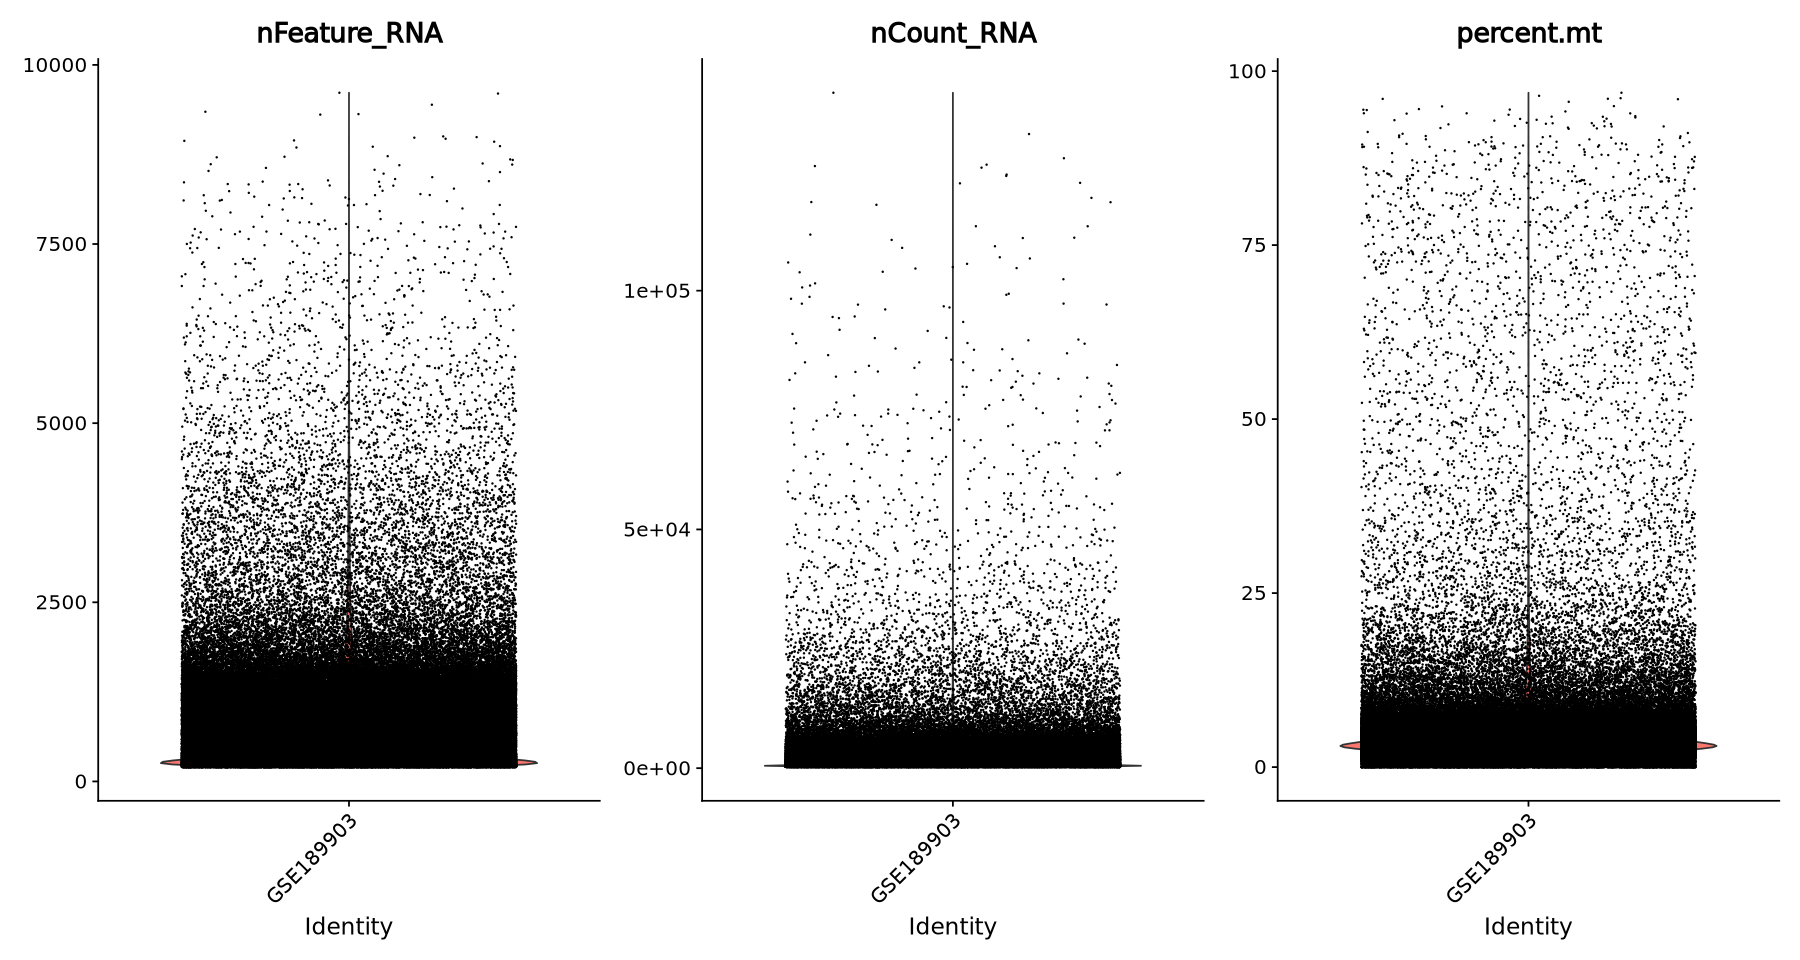

In [32]:
#QC Steps 
LIV[["percent.mt"]] <- PercentageFeatureSet(LIV, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(LIV, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [33]:
#Normalise the data
LIV <- NormalizeData(LIV)
#Find variable features
LIV <- FindVariableFeatures(LIV, selection.method = "vst", nfeatures = 2000)
#Scale the data
LIV <- ScaleData(LIV, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
LIV <- RunPCA(LIV, features = VariableFeatures(object = LIV))

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Normalizing layer: counts.9

Normalizing layer: counts.10

Normalizing layer: counts.11

Normalizing layer: counts.12

Normalizing layer: counts.13

Normalizing layer: counts.14

Normalizing layer: counts.15

Normalizing layer: counts.16

Normalizing layer: counts.17

Normalizing layer: counts.18

Normalizing layer: counts.19

Normalizing layer: counts.20

Normalizing layer: counts.21

Normalizing layer: counts.22

Normalizing layer: counts.23

Normalizing layer: counts.24

Normalizing layer: counts.25

Normalizing layer: counts.26

Normalizing layer: counts.27

Normalizing layer: counts.28

Normalizing layer: counts.29

Normalizing layer: counts.30

Normalizing layer: counts.31

Normalizing layer: counts.32

Normalizing layer: counts.33

Normalizing layer: 

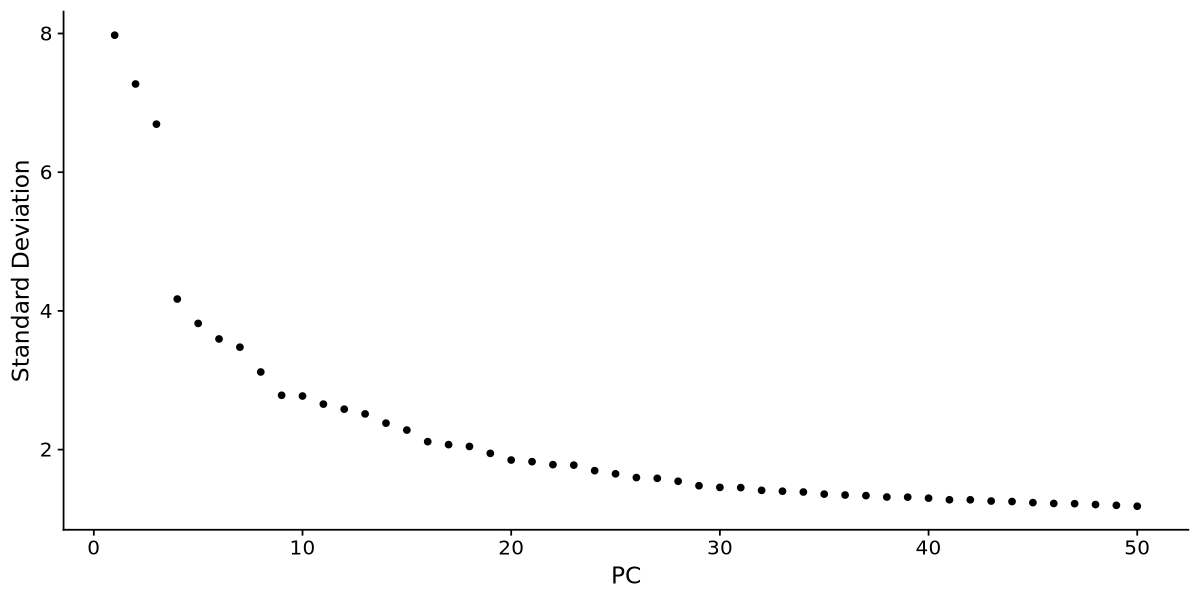

In [34]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(LIV, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [35]:
#Find neighbours (make sure number matches no. features chosen above)
LIV <- FindNeighbors(LIV, dims = 1:40)

Computing nearest neighbor graph

Computing SNN



In [36]:
#Run UMAP
LIV <- RunUMAP(LIV, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:03:52 UMAP embedding parameters a = 0.9922 b = 1.112

12:03:52 Read 255708 rows and found 40 numeric columns

12:03:52 Using Annoy for neighbor search, n_neighbors = 30

12:03:52 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:04:13 Writing NN index file to temp file /scratch/temp/9799129/RtmpDnfeKI/file302a0d1fd07316

12:04:13 Searching Annoy index using 1 thread, search_k = 3000

12:05:53 Annoy recall = 100%

12:05:57 Commencing smooth kNN distance calibration using 1 thread
 with

In [37]:
#Cluster, resolution here set to 0.2
LIV <- FindClusters(LIV, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 255708
Number of edges: 7212042

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9598
Number of communities: 71
Elapsed time: 120 seconds


50 singletons identified. 21 final clusters.



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



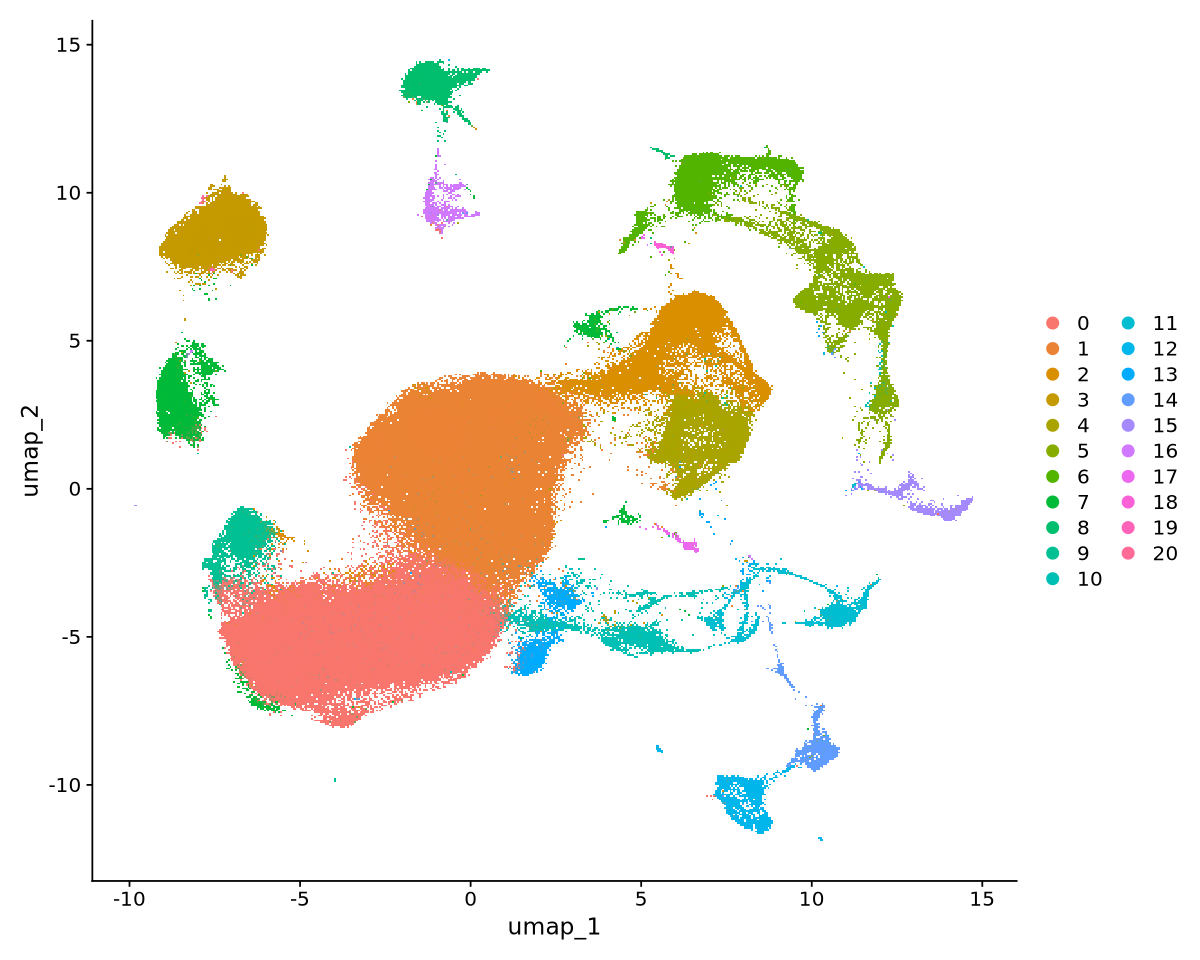

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



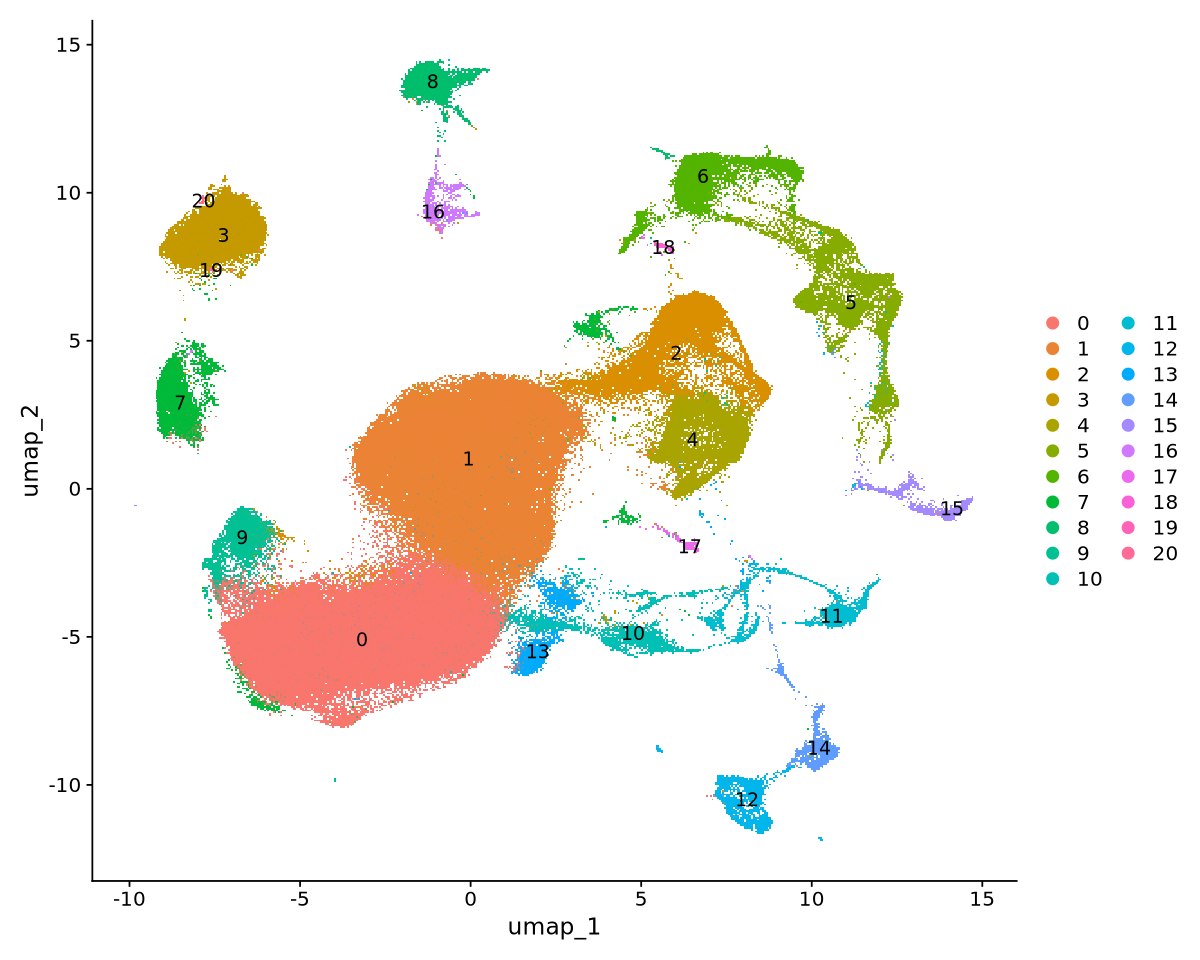

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



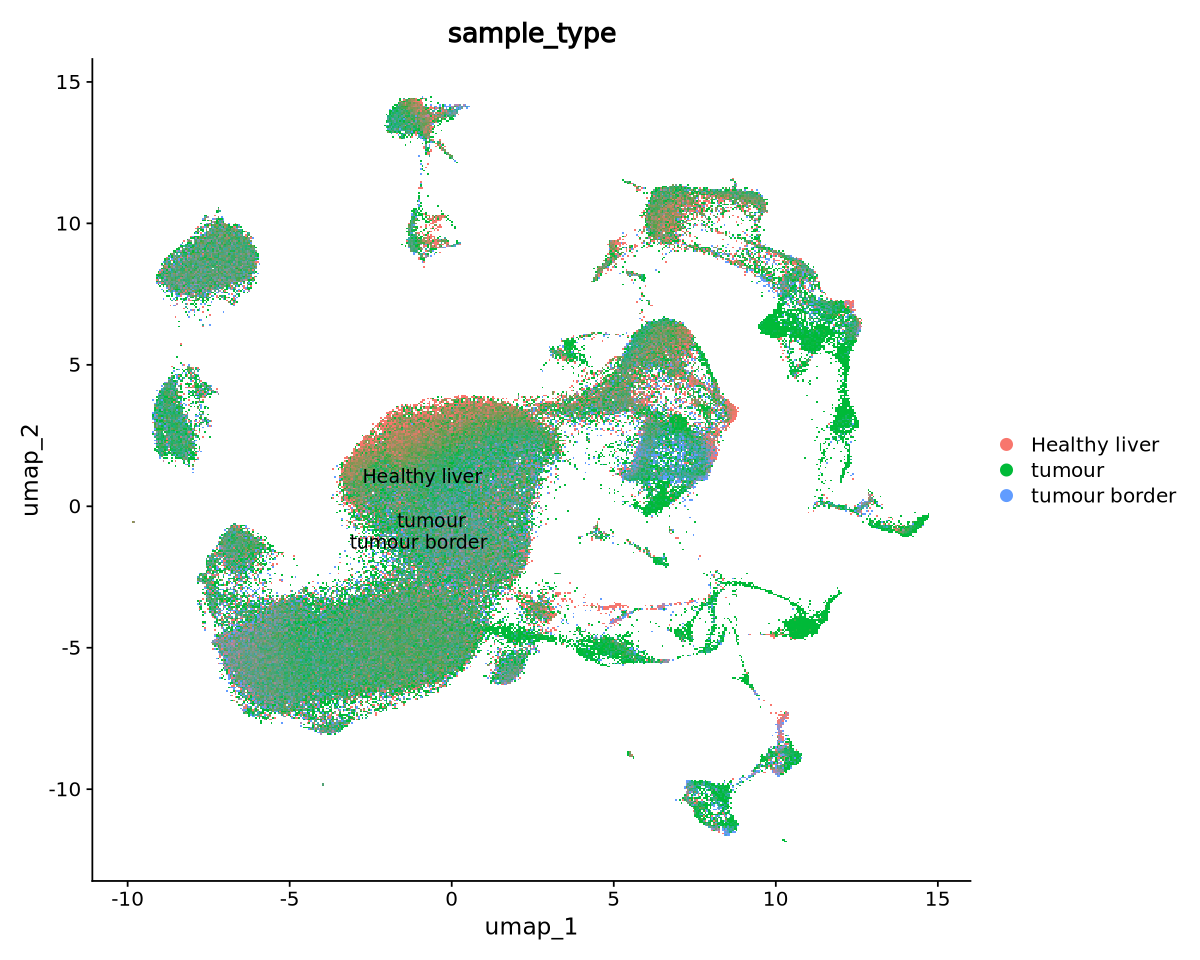

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



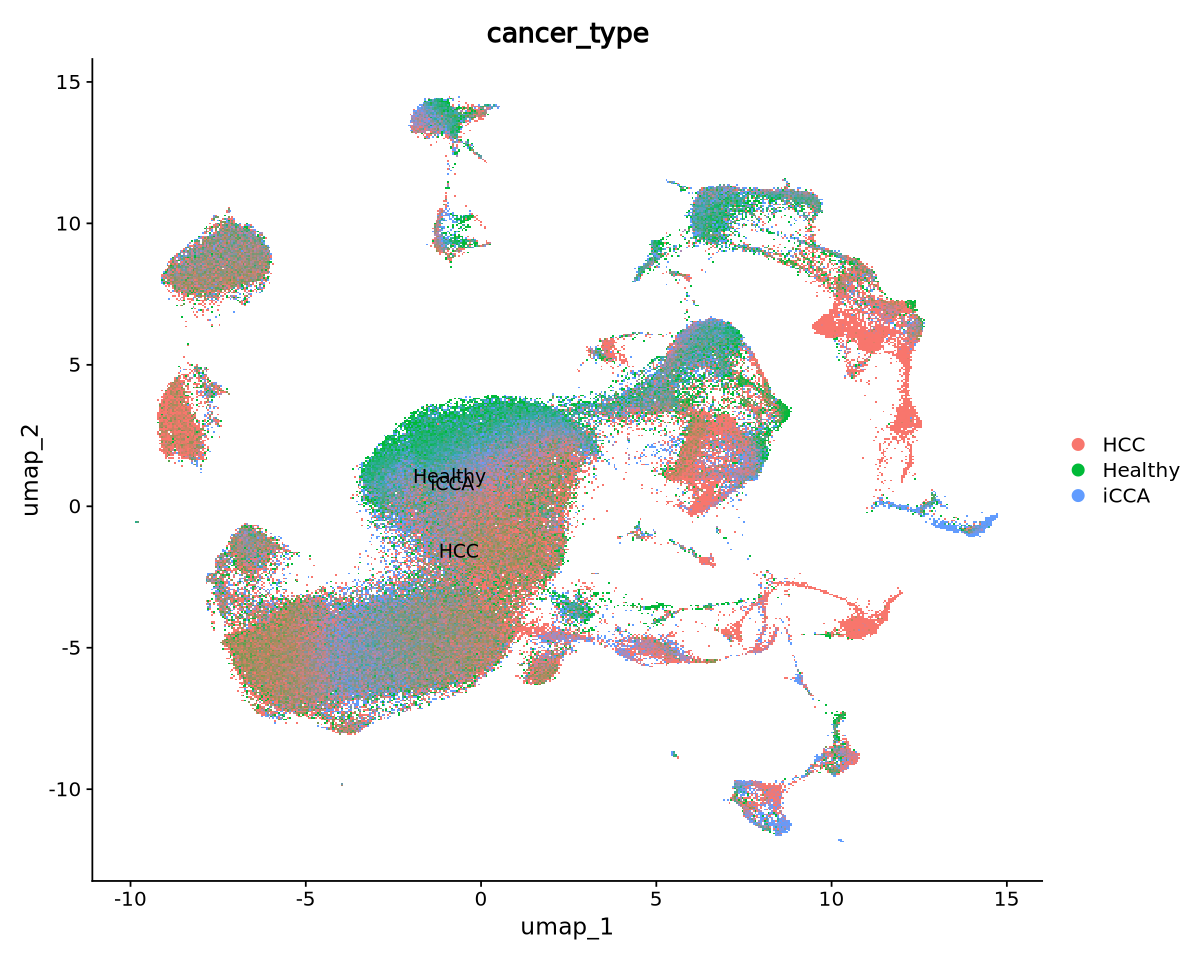

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



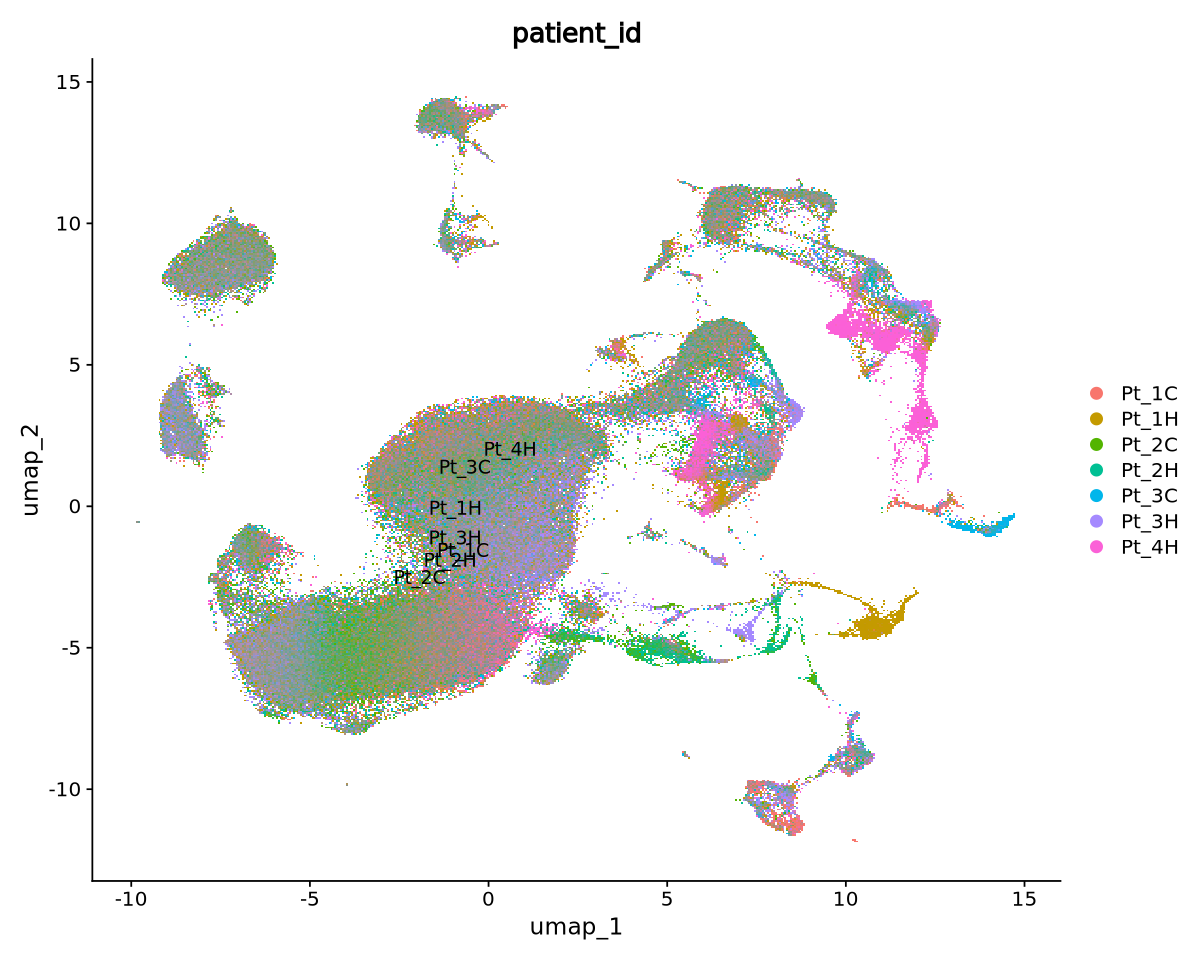

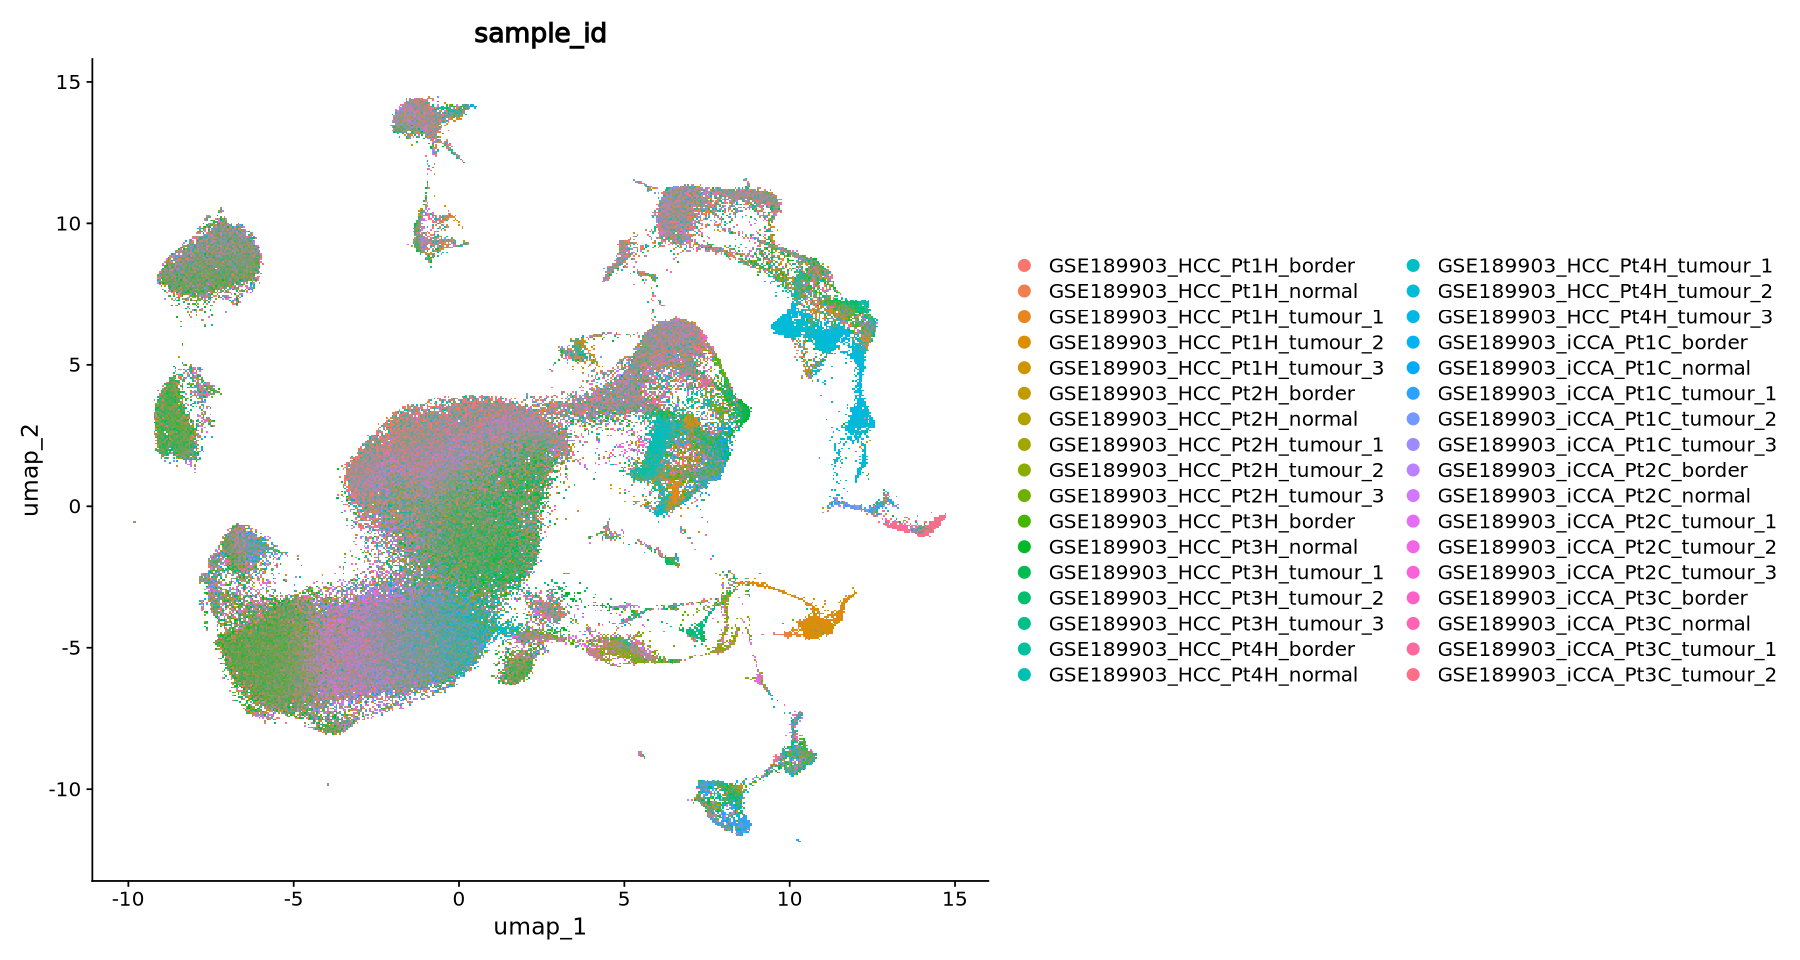

In [40]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(LIV, reduction = "umap")
DimPlot(LIV, reduction = "umap", label=TRUE)
DimPlot(LIV, reduction = "umap", label=TRUE, group = "sample_type")
DimPlot(LIV, reduction = "umap", label=TRUE, group = "cancer_type")
DimPlot(LIV, reduction = "umap", label=TRUE, group = "patient_id")
options(repr.plot.height=8, repr.plot.width=15)
DimPlot(LIV, reduction = "umap", label=FALSE, group = "sample_id")

In [41]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(LIV, file = "/scratch/user/s4436039/scdata/GSE189903/GSE189903.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To di

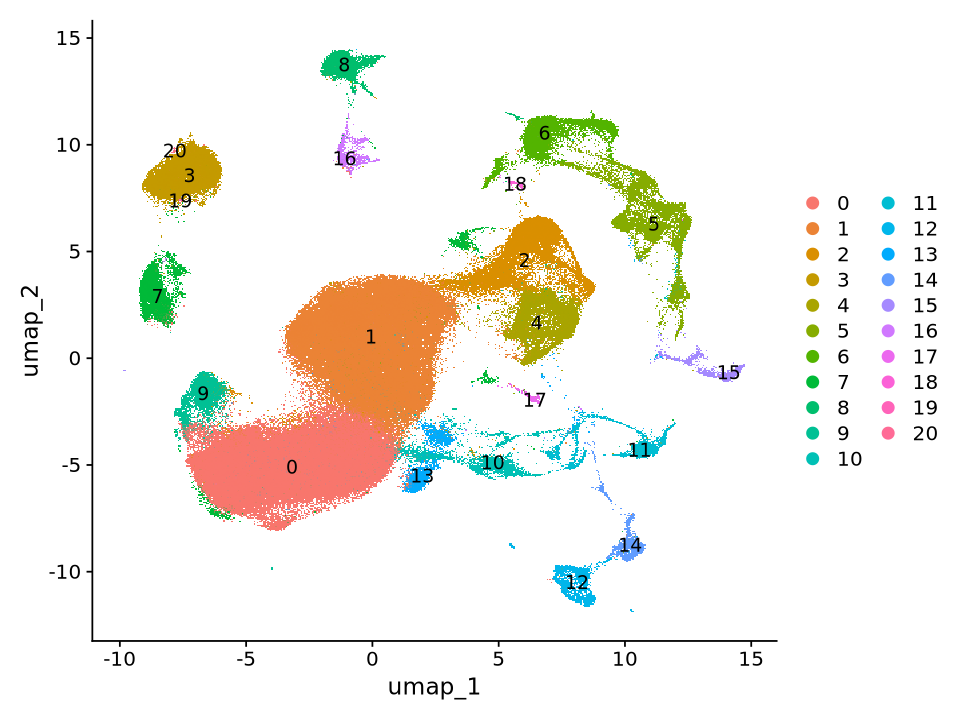

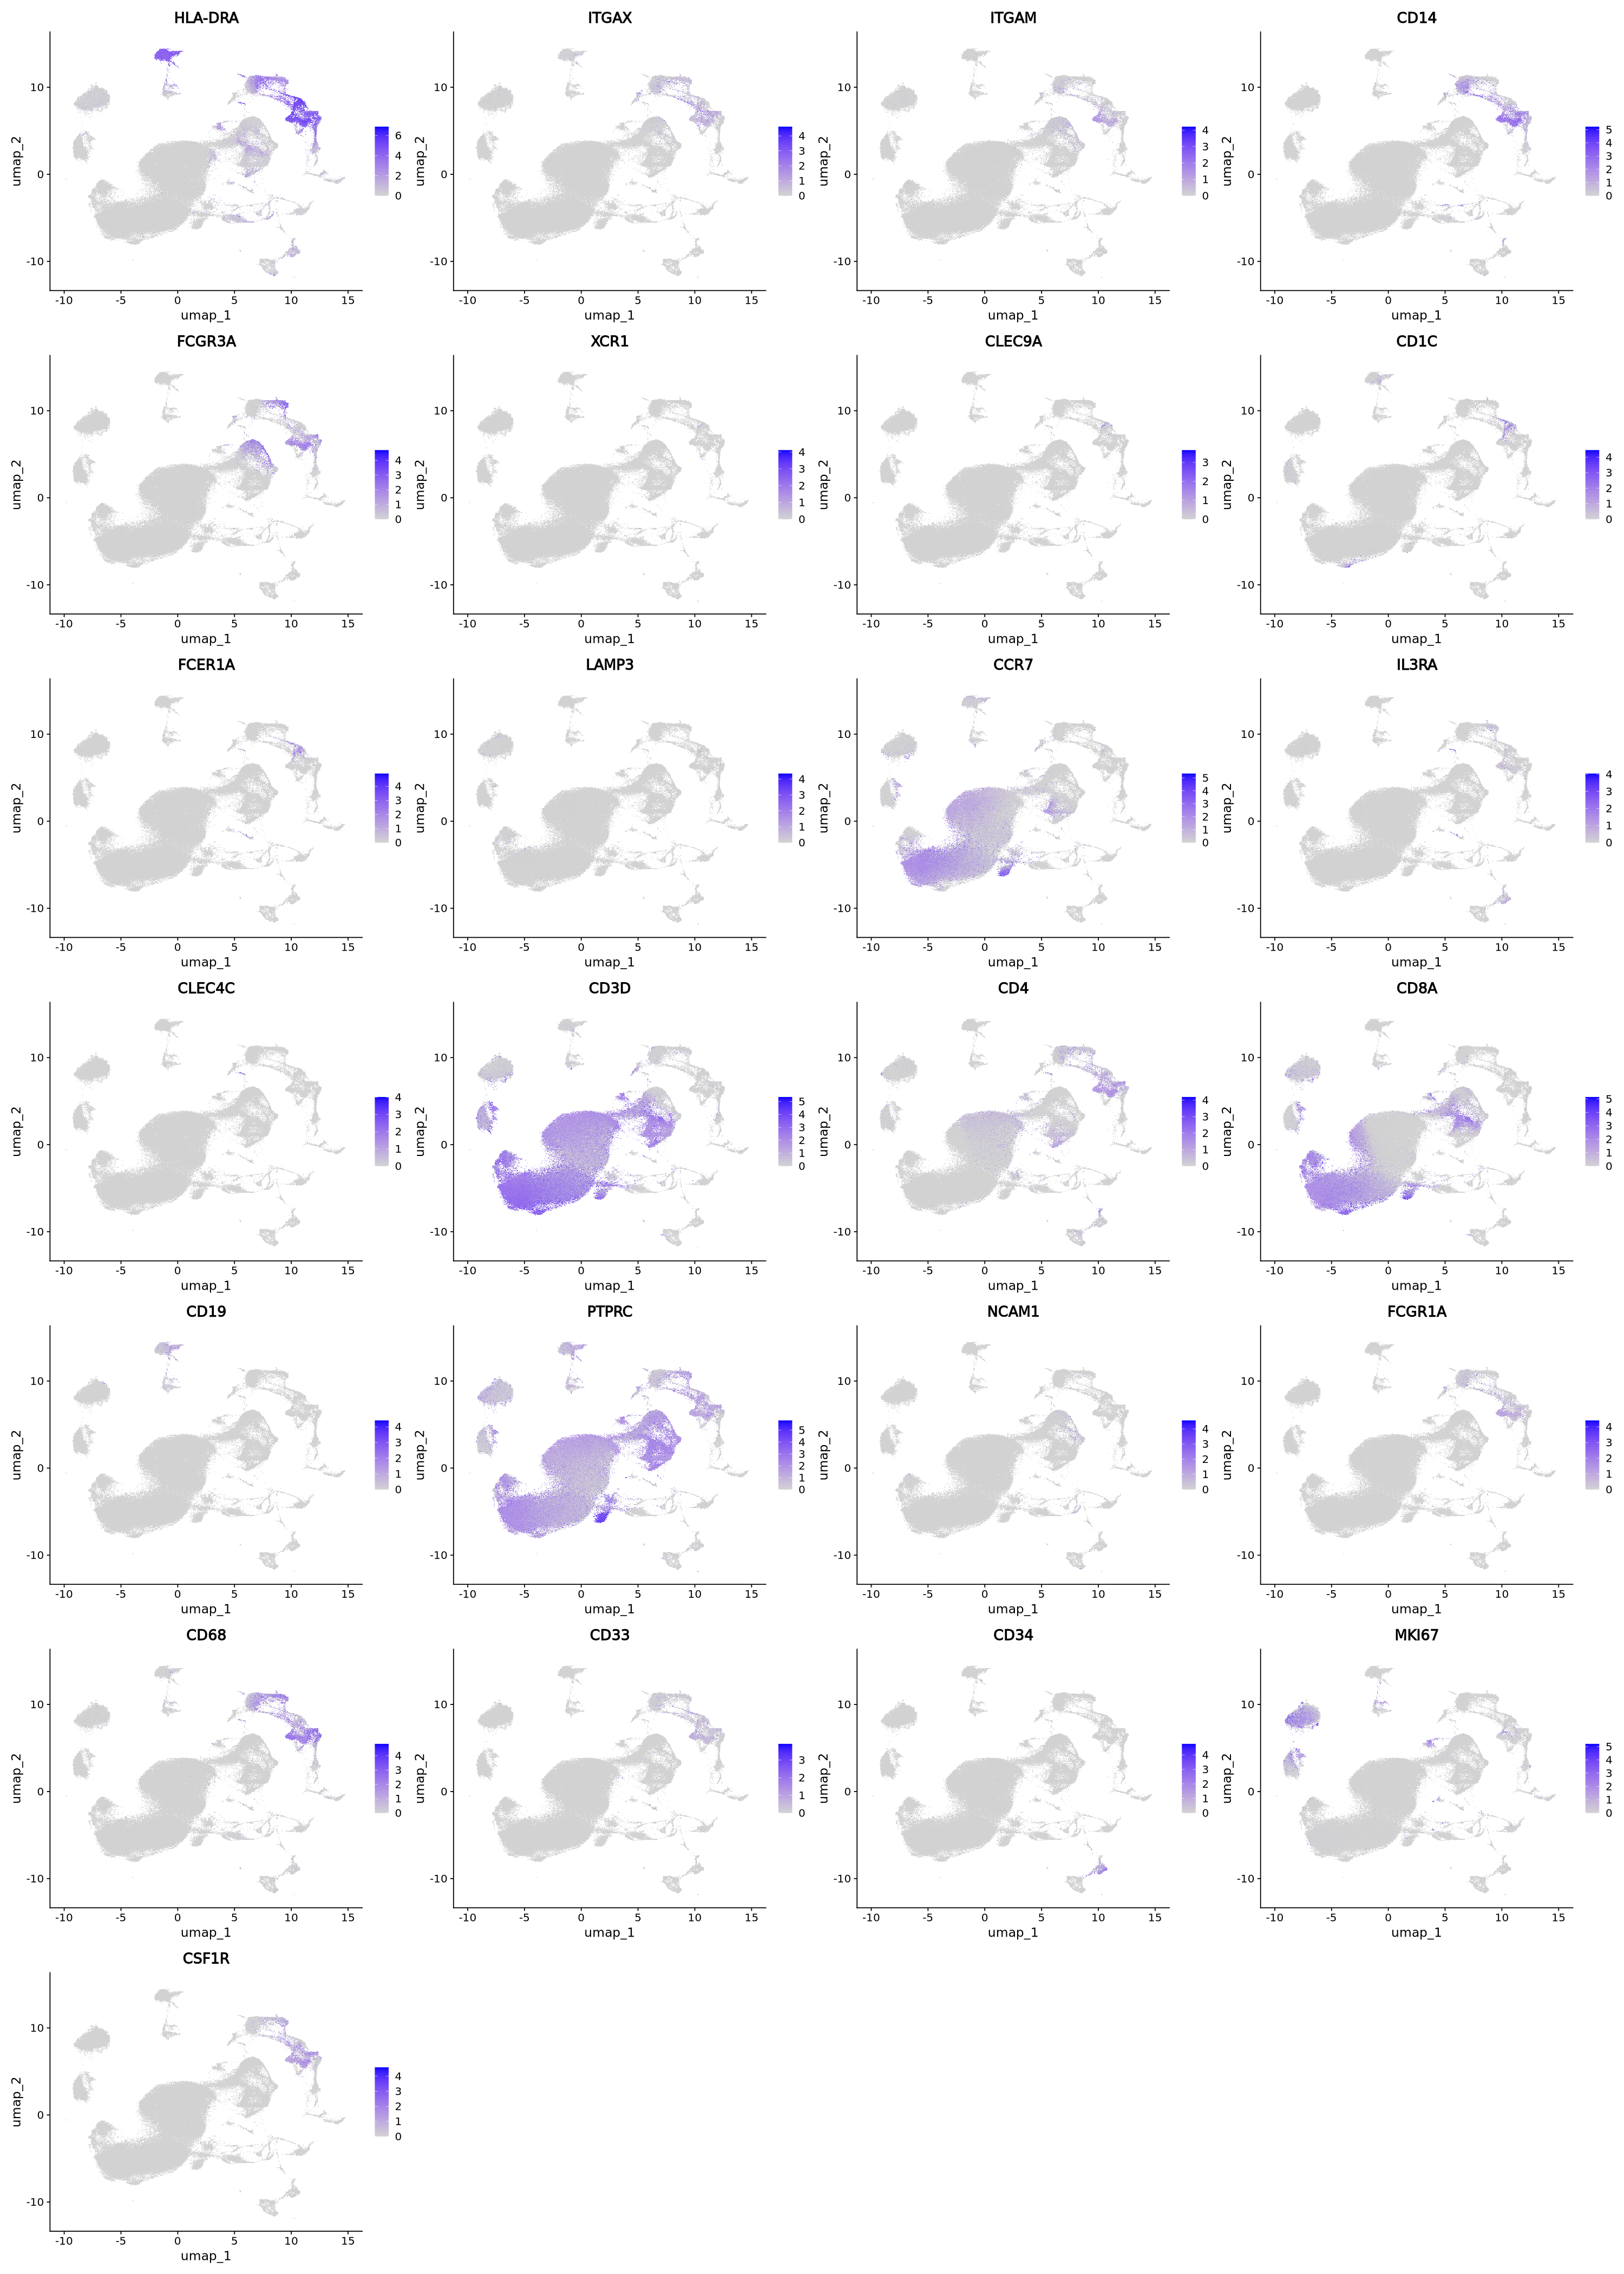

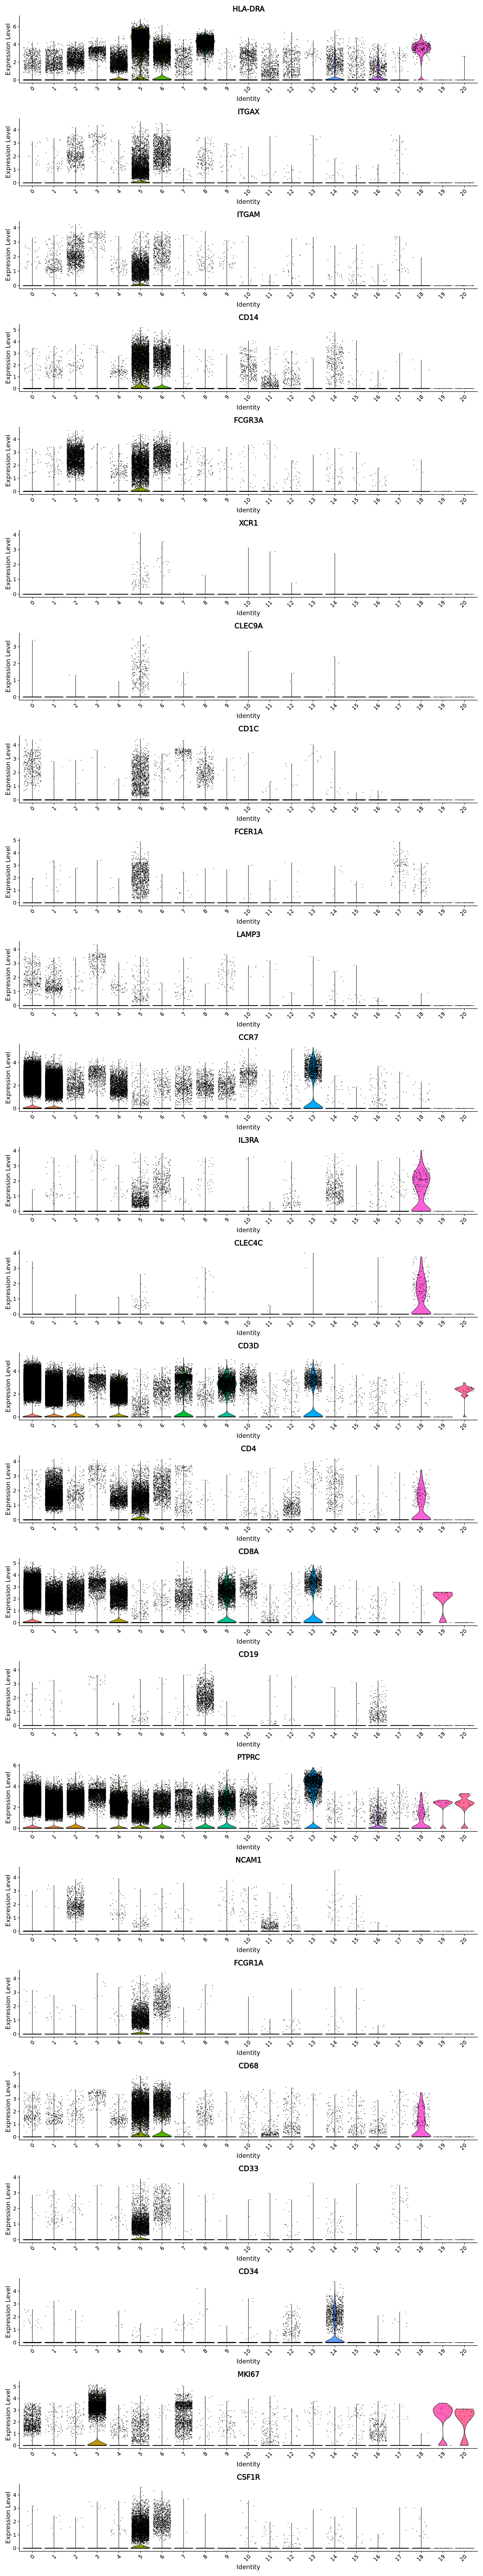

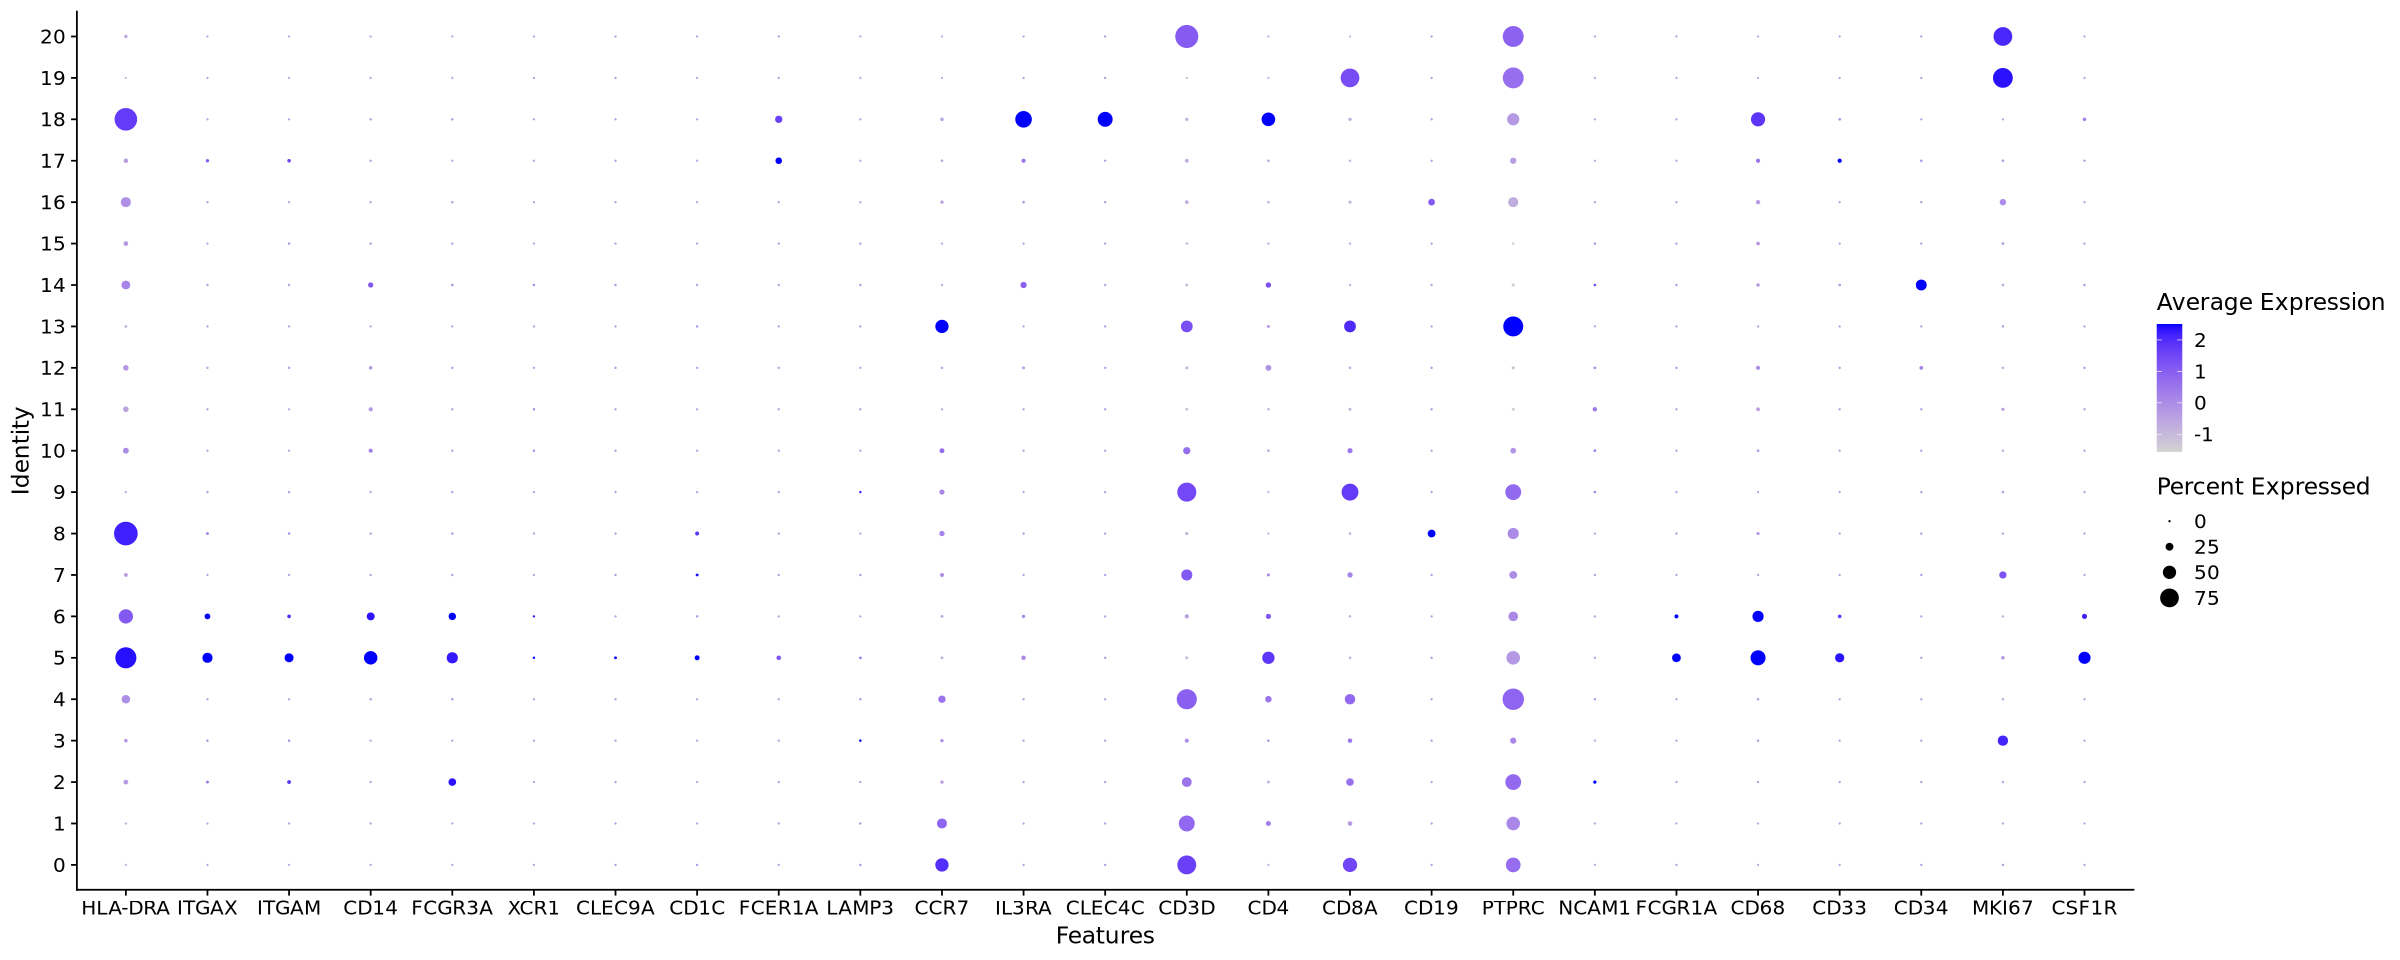

In [42]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(LIV, reduction = "umap", label=TRUE)

options(repr.plot.height=35, repr.plot.width=25)
FeaturePlot(LIV, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(LIV, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(LIV, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))
     

#### From above it looks like clusters 5 and 6 are the myeloid cells, now subsetting out these clusters

In [43]:
head(LIV@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE189903_1CB_AAACGGGAGTCCATAC-1 GSE189903   617        351        
GSE189903_1CB_AAAGATGCATATGCTG-1 GSE189903  1321        720        
GSE189903_1CB_AAAGATGTCCCGGATG-1 GSE189903   492        324        
GSE189903_1CB_AAAGCAAAGTGCCATT-1 GSE189903  1038        562        
GSE189903_1CB_AAAGCAAAGTGTGGCA-1 GSE189903  2246       1179        
GSE189903_1CB_AAAGCAAAGTTTGCGT-1 GSE189903  1057        772        
                                 sample_type   cancer_type patient_id
GSE189903_1CB_AAACGGGAGTCCATAC-1 tumour border iCCA        Pt_1C     
GSE189903_1CB_AAAGATGCATATGCTG-1 tumour border iCCA        Pt_1C     
GSE189903_1CB_AAAGATGTCCCGGATG-1 tumour border iCCA        Pt_1C     
GSE189903_1CB_AAAGCAAAGTGCCATT-1 tumour border iCCA        Pt_1C     
GSE189903_1CB_AAAGCAAAGTGTGGCA-1 tumour border iCCA        Pt_1C     
GSE189903_1CB_AAAGCAAAGTTTGCGT-1 tumour border iCCA        Pt_1C     
                                 sample_id                  percent.mt
GSE189903_1CB_AAACGGGAGTCCATAC-1 GSE189903_iCCA_Pt1C_border 12.317666 
GSE189903_1CB_AAAGATGCATATGCTG-1 GSE189903_iCCA_Pt1C_border  4.617714 
GSE189903_1CB_AAAGATGTCCCGGATG-1 GSE189903_iCCA_Pt1C_border 25.406504 
GSE189903_1CB_AAAGCAAAGTGCCATT-1 GSE189903_iCCA_Pt1C_border  8.285164 
GSE189903_1CB_AAAGCAAAGTGTGGCA-1 GSE189903_iCCA_Pt1C_border  7.301870 
GSE189903_1CB_AAAGCAAAGTTTGCGT-1 GSE189903_iCCA_Pt1C_border  6.338694 
                                 RNA_snn_res.0.2 seurat_clusters
GSE189903_1CB_AAACGGGAGTCCATAC-1 1               1              
GSE189903_1CB_AAAGATGCATATGCTG-1 4               4              
GSE189903_1CB_AAAGATGTCCCGGATG-1 13              13             
GSE189903_1CB_AAAGCAAAGTGCCATT-1 12              12             
GSE189903_1CB_AAAGCAAAGTGTGGCA-1 14              14             
GSE189903_1CB_AAAGCAAAGTTTGCGT-1 8               8

In [44]:
myeloid_LIV <- subset(LIV, subset = RNA_snn_res.0.2 %in% c("5","6"))

In [45]:
LIV
myeloid_LIV

An object of class Seurat 
33538 features across 255708 samples within 1 assay 
Active assay: RNA (33538 features, 2000 variable features)
 69 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17, counts.18, counts.19, counts.20, counts.21, counts.22, counts.23, counts.24, counts.25, counts.26, counts.27, counts.28, counts.29, counts.30, counts.31, counts.32, counts.33, counts.34, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, data.13, data.14, data.15, data.16, data.17, data.18, data.19, data.20, data.21, data.22, data.23, data.24, data.25, data.26, data.27, data.28, data.29, data.30, data.31, data.32, data.33, data.34, scale.data
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
33538 features across 18630 samples within 1 assay 
Active assay: RNA (33538 features, 2000 variable features)
 69 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17, counts.18, counts.19, counts.20, counts.21, counts.22, counts.23, counts.24, counts.25, counts.26, counts.27, counts.28, counts.29, counts.30, counts.31, counts.32, counts.33, counts.34, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, data.13, data.14, data.15, data.16, data.17, data.18, data.19, data.20, data.21, data.22, data.23, data.24, data.25, data.26, data.27, data.28, data.29, data.30, data.31, data.32, data.33, data.34, scale.data
 2 dimensional reductions calculated: pca, umap

In [46]:
saveRDS(myeloid_LIV, "/scratch/user/s4436039/scdata/GSE189903/GSE189903_myeloid.RDS")

#### Following the above then need to move entire GSE189903 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE189903/ /QRISdata/Q5935/nikita/scdata/GSE189903
```